In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.io

# 1. Implement K-means clustering methods (40 points)

In [41]:
def Kmeans(x,k):
    '''
    input:
        x: input features
        k: k clusters
        N: N objects that is near to center
    '''
    # Step 2: Initialize the k cluster centers
    # Random choose the centers from data set
    m, n = x.shape
    index = np.random.randint(0,m,k)
    center = x[index,:]        
    
    # Step 3-5
    
    ite = 0
    temp_p = []
    pred = np.inf
    while pred != temp_p:  
        pred = temp_p
        temp_p=[]
        for raw in range(m):
            dis = np.linalg.norm(x[raw,:]-center, axis = 1)
            temp_p.append(np.argmin(dis))
        df = pd.DataFrame(x)
        df['label']=temp_p
        center = df.groupby('label').mean().to_numpy()
        #print(center)
        if center.shape[0]!=k:
            index = np.random.randint(0,m,k-center.shape[0])
            center = np.append(center,x[index,:],axis=0)
            
        # Draw the centers and data points----------------------------------------------
        print(ite)
        plt.figure (figsize = (10,8))
        seaborn_plot = plt.axes (projection='3d')
        for i in range(k):
            temp = df[df['label']==i]
            seaborn_plot.scatter3D (temp.iloc[:,0], temp.iloc[:,1], temp.iloc[:,2],alpha=0.4)
            seaborn_plot.scatter3D (center[i,0], center[i,1], center[i,2],c='black',s=40)
        seaborn_plot.set_xlabel ('f1')
        seaborn_plot.set_ylabel ('f2')
        seaborn_plot.set_zlabel ('f3')
        plt.show ()
        #---------------------------------------------------------------------------------
        ite+=1  
        
    return df
            
            
        
        
        

# 2. Load data.mat and then perform K-means of x, show the intermediate figures, e.g., iteration = 100, 200, 300, ... (40 points)

In [3]:
mat = scipy.io.loadmat('data.mat')
x = mat['x']
y = mat['labels']

In [4]:
x.shape

(498, 3)

In [5]:
len(y)

498

In [6]:
y

array([[ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 2],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 3],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 4],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],
       [ 5],

0


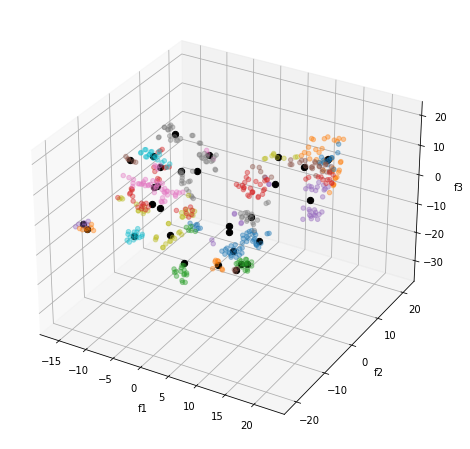

1


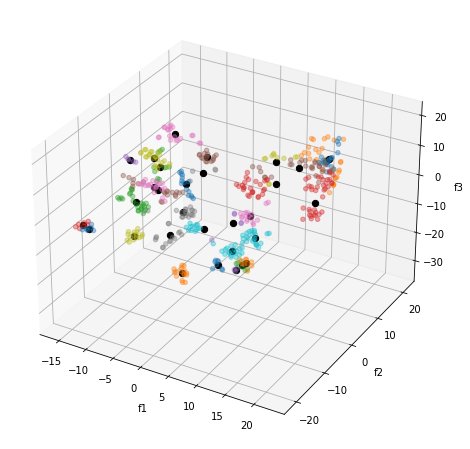

2


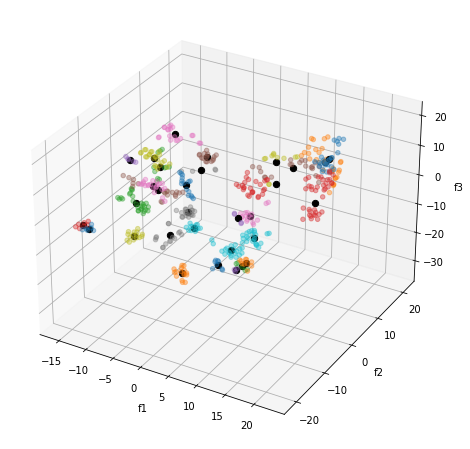

3


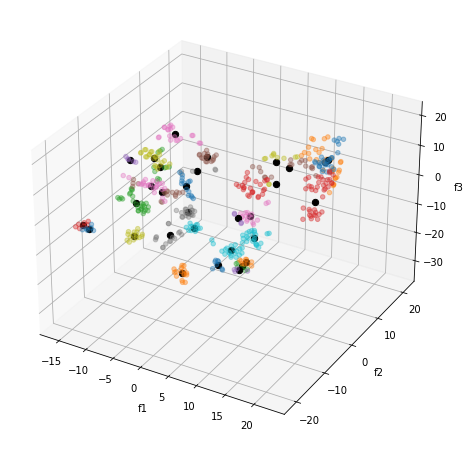

4


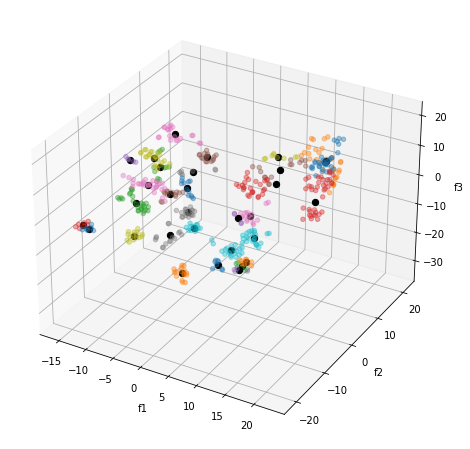

5


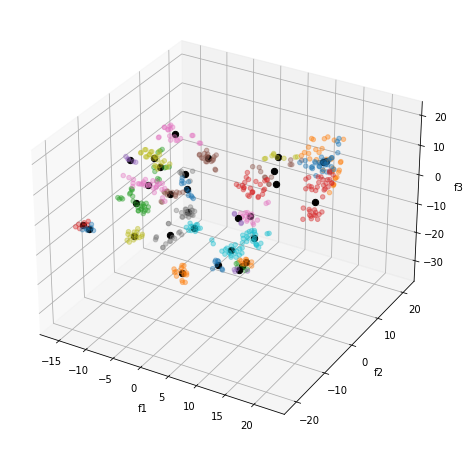

6


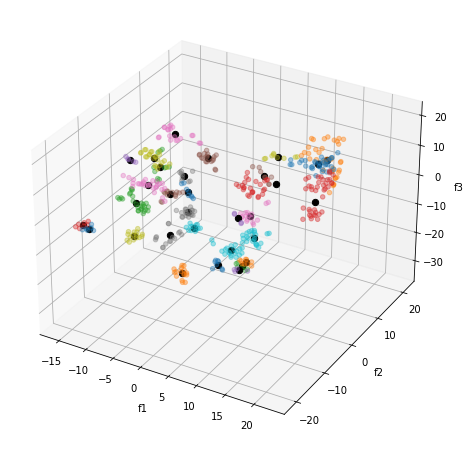

7


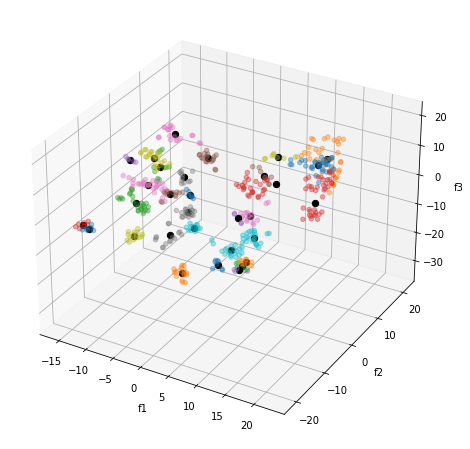

8


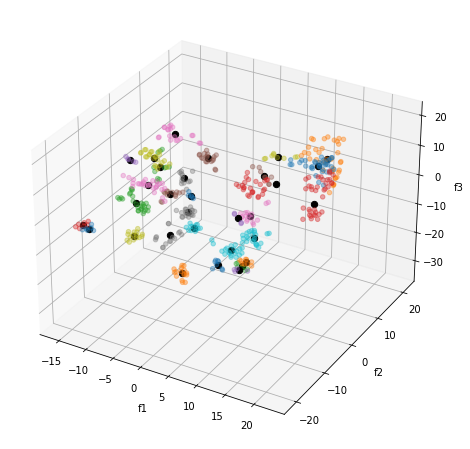

9


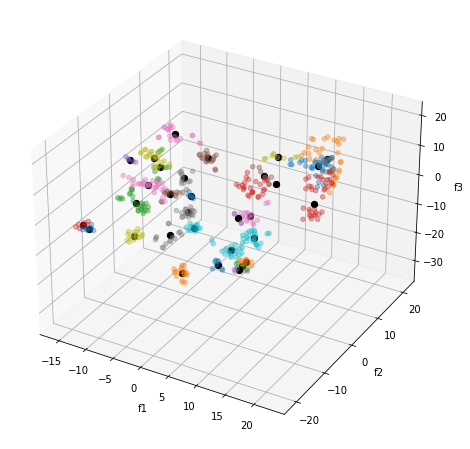

10


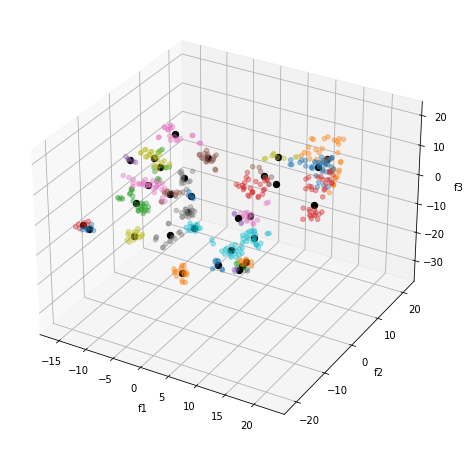

11


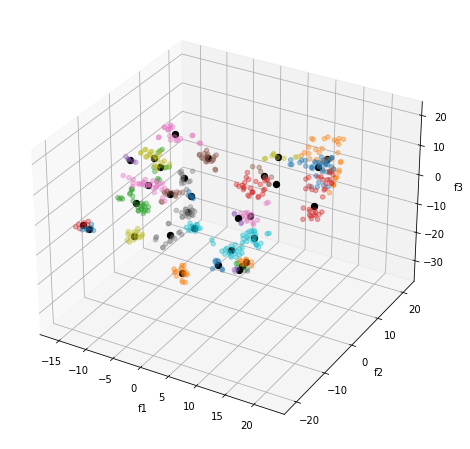

12


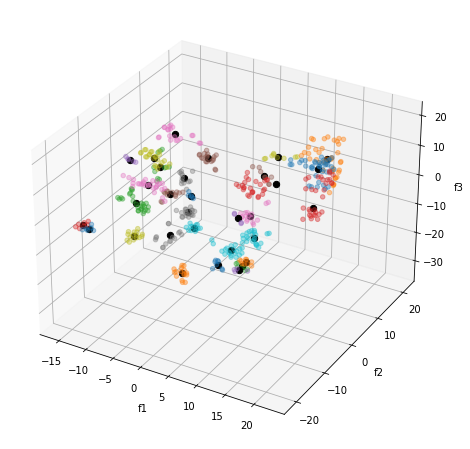

13


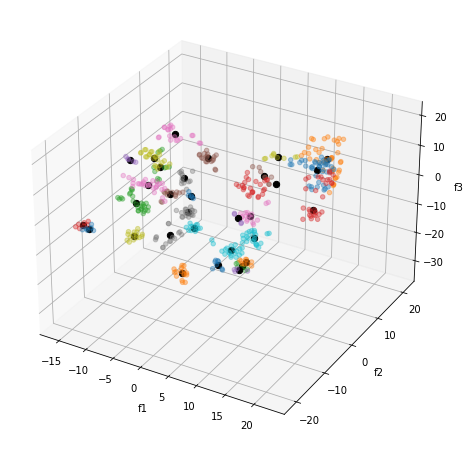

14


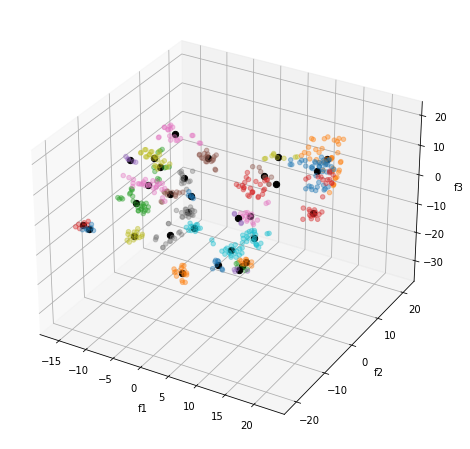

15


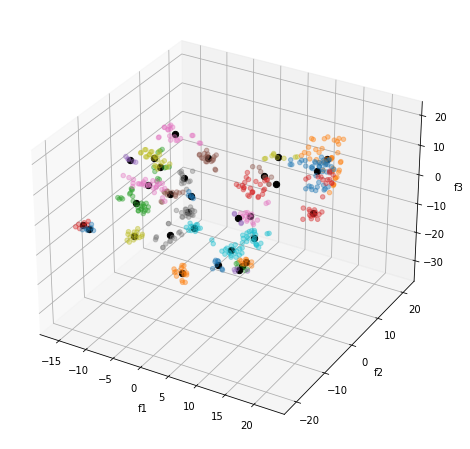

In [7]:
res = Kmeans(x,31)

# 3. Calculate the accuracy using labels (20 points)

In [8]:
res['y']= y

In [9]:
# Choose the mode in group y_i to be the correct cluster 
correct=0
for i in range(1,32):
    print('y:',i)
    print(res[res['y']==i].groupby('label').count())
    temp = res[res['y']==i].groupby('label').count().max()[0] # the most one is the group is the correct one
    print()
    print('max count:',temp)
    print('**********************')
    correct+=temp
    

y: 1
        0   1   2   y
label                
29     12  12  12  12

max count: 12
**********************
y: 2
       0  1  2  y
label            
2      8  8  8  8
14     4  4  4  4
21     9  9  9  9

max count: 9
**********************
y: 3
        0   1   2   y
label                
9      22  22  22  22
16      2   2   2   2

max count: 22
**********************
y: 4
        0   1   2   y
label                
22     12  12  12  12

max count: 12
**********************
y: 5
        0   1   2   y
label                
11     16  16  16  16

max count: 16
**********************
y: 6
        0   1   2   y
label                
0      11  11  11  11
23      1   1   1   1

max count: 11
**********************
y: 7
       0  1  2  y
label            
13     7  7  7  7
20     6  6  6  6

max count: 7
**********************
y: 8
        0   1   2   y
label                
17     13  13  13  13
23      1   1   1   1

max count: 13
**********************
y: 9
        0   1   2   y
label  

In [10]:
print('accuracy:',round(correct/len(y)*100,2),'%')

accuracy: 89.36 %
